<img style="border-radius: 0.5rem;" src="banner.jpg" />
<a style="margin-top: 1rem;" class="btn btn-lg btn-block btn-success" href="https://dsg.ucfsigai.org/fa18/signin/">
    Sign in (https://dsg.ucfsigai.org/fa18/signin/)
</a>

# Let Data Speak Using Regression & Plots
---
by: Aidan Lakshman \([@ahl98](github.com/ahl98/)\), on 09 Sep 2018

--------------------------------------------------

# **Linear Regression**

--------------------------------------------------

In [1]:
#import statements
import matplotlib.pyplot as plt
import numpy as np

I'm bad at markdown so my cells are going to be super simple.

We're just generating some data here. I made a quick roughly linear dataset, you can easily put in any data you want here and test it.

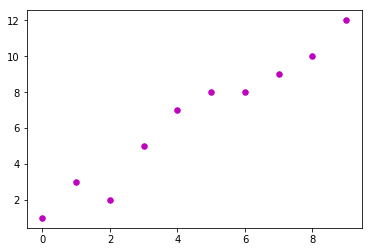

In [2]:
#Get some data 
sample_x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
sample_y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])


#feel free to use your own data here if you want to change it up, or if you use a csv later
x = sample_x
y = sample_y

#Let's plot the data to see what it looks like
plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
plt.show()

Here's the meat of the calculations

This is using least squares estimation, which tries to minimize the squared error of the function vs. the training data. SS_xy is the cross deviation about x, and SS_xx is the deviation about x. There's a link to the math behind linear regression at the bottom, it's basically some roundabout algebra methods to optimize a function. The concept isn't super complicated but it gets hairy when you do it by hand.

In [3]:
#calculating the coefficients

# number of observations/points 
n = np.size(x) 

# mean of x and y vector 
m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
SS_xy = np.sum(y*x - n*m_y*m_x) 
SS_xx = np.sum(x*x - n*m_x*m_x) 

# calculating regression coefficients 
b_1 = SS_xy / SS_xx 
b_0 = m_y - b_1*m_x

#var to hold the coefficients
b = (b_0, b_1)

#print out the estimated coefficients
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 

Estimated coefficients:
b_0 = -0.05862068965517242 
b_1 = 1.457471264367816


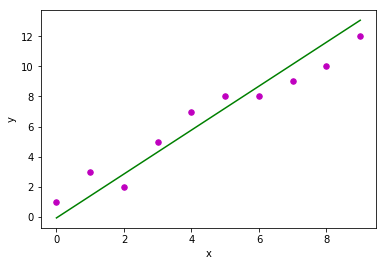

In [4]:
# plotting the actual points as scatter plot 
plt.scatter(x, y, color = "m", 
           marker = "o", s = 30) 

# predicted response vector 
y_pred = b[0] + b[1]*x 

# plotting the regression line 
plt.plot(x, y_pred, color = "g") 

# putting labels 
plt.xlabel('x') 
plt.ylabel('y') 

# function to show plot 
plt.show() 

So now we can make predictions with new points based off our data.

In [5]:
#function to let us make predictions for unlabelled data
def make_prediction(x):
    print(b[0] + b[1]*x)

In [6]:
#here we can try out any data point
make_prediction(10)

14.51609195402299


https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf 


^link to algebraic derivation of least squares regression

--------------------------------------------

# **Logistic Regression**

--------------------------------------------

In [8]:
#we're going to use a dataset of handwritten digits for this example

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np 
import matplotlib.pyplot as plt


Image Data Shape (1797, 64)
Label Data Shape (1797,)


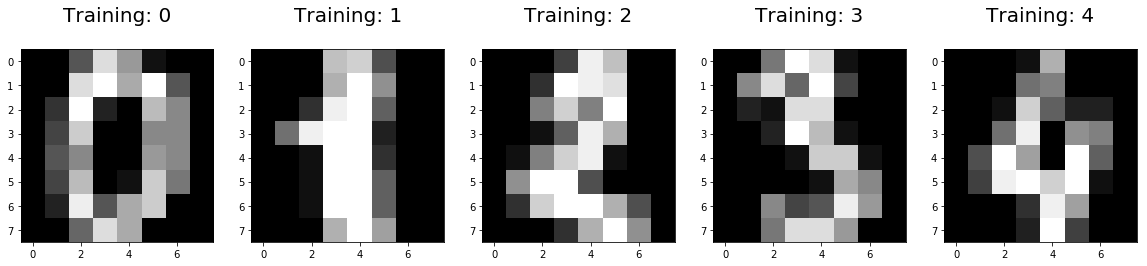

In [9]:
#In here we're basically just examining the data

#load the data
digits = load_digits()


# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

- - - - - - - - - - - - - - - - - - - - - - -
Here we're going to split our data into two sections, one for training the model, and one for testing it.


In [10]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

#Now we create an instance of the model (logistic regression)
#below you'll see some output, this is because the LogisticRegression() class is taking default parameters since none are provided
logisticRegr = LogisticRegression()

#and now we fit the model to our data, using sklearn's inbuilt process (MLE)
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- - - - - - - - - - - - - - - - - - - - - - -
Now we have a model, so we can make predictions.

In [11]:


# each of these return a NumPy Array

# Predict for One Observation (image)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

#predict for multiple observations
print(logisticRegr.predict(x_test[0:10]))

#predict for entire test set
predictions = logisticRegr.predict(x_test)

[2]
[2 8 2 6 6 7 1 9 8 5]


- - - - - - - - - - - - - - - - - - - - - - -
We can score our model based on how well it predicts the data.

In [12]:
#this scores by taking (#of correct predictions) / (# of datapoints)

score = 100 * logisticRegr.score(x_test, y_test)
print("%.2f" % round(score,2) + "% Accuracy")

95.33% Accuracy


- - - - - - - - - - - - - - - - - - - - - - -
It would be nice to see what we're predicting though--this block of code shows us a random selection of entries from the test dataset, and what the model predicted for each of them.

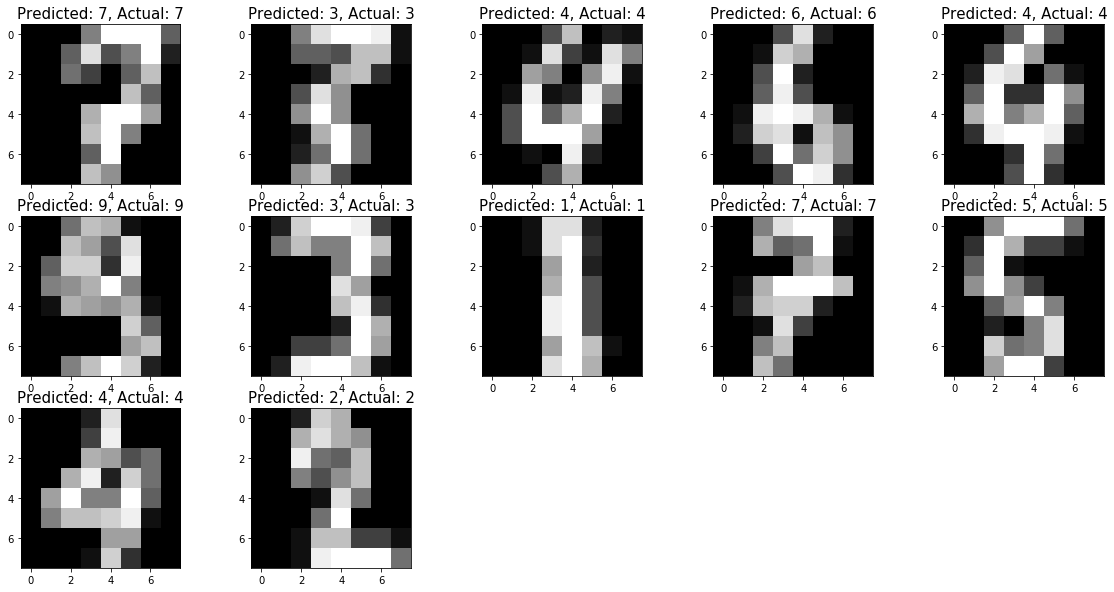

In [13]:
import random
index = 0
num_to_graph = 12
classifiedIndex = []
for label, predict in zip(y_test, predictions):
    if index < num_to_graph: 
        classifiedIndex.append(int(random.random() * x_test.shape[0]))
        index += 1

plt.figure(figsize=(20,4 * num_to_graph//5 + 1))
for plotIndex, index in enumerate(classifiedIndex[0:num_to_graph]):
    plt.subplot(num_to_graph//5 + 1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[index], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[index], y_test[index]), fontsize = 15)

This cell was in the template jupyter notebook--I'm not sure if it's needed for anything so it's here.

In [ ]:
def dataset(path):
    import os
    from pathlib import Path
    datadir = Path(os.environ["DATA_DIR"])
    return Path(datadir.joinpath(path))